### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Матюшкин Денис Владимирович
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 8

Текст задания:

1. Набор данных: cherry_blossoms

2. Независимая переменная: temp

3. Зависимая переменная: temp_upper

4. Визуализация для независимой переменной – эмпирическая функция распределения

5. Визуализация для зависимой переменной – диаграмма размаха

6. Показатель качества регрессии – MSE (mean squared error)

### Решение

1.  Загрузите набор данных cherry_blossoms из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая независимую temp и зависимую temp_upper переменные. Вычислите матрицу корреляции признаков и выведите названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией.

Набор состоит из исторических фенологических данных по цветению вишневых деревьев в городе Киото.

In [132]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

data_set = tfds.load("cherry_blossoms", split='train')
data_set

<_PrefetchDataset element_spec={'doy': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp_lower': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp_upper': TensorSpec(shape=(), dtype=tf.float32, name=None), 'year': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

Преобразуем PrefetchDataset в DataFrame:

In [133]:
data_frame = tfds.as_dataframe(data_set)
data_frame.head()

,doy,temp,temp_lower,temp_upper,year
0,NaN,6.46,4.76,8.16,1300
1,105.0,5.63,4.90,6.37,1638
2,109.0,5.81,4.68,6.95,1347
3,104.0,5.70,4.87,6.53,1187
4,107.0,6.20,5.31,7.09,1617


В наборе данных есть признак дискретных значений (year), оставляем только непрервные:

In [134]:
data_frame = data_frame[['temp', 'temp_lower', 'temp_upper']]
data_frame = data_frame.dropna()
data_frame

,temp,temp_lower,temp_upper
0,6.46,4.76,8.16
1,5.63,4.90,6.37
2,5.81,4.68,6.95
3,5.70,4.87,6.53
4,6.20,5.31,7.09
...,...,...,...
1210,6.45,5.81,7.10
1211,5.71,4.97,6.44
1212,6.68,6.08,7.27
1213,6.15,5.29,7.01


Вычисляем матрицу корреляции признаков и выведем названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией.

In [135]:
correlation_df = data_frame.corr()
print(correlation_df)

# замена диагональные 1 на NaN
np.fill_diagonal(correlation_df.values, np.nan)
# матрица в столбец
stack_corr = correlation_df.stack()
sort_corr = stack_corr.sort_values()
max = sort_corr.tail(1).index[0]
min = sort_corr.head(1).index[0]
print(f"Набиольшее: {max}")
print(f"Наименьшая: {min}")

                temp  temp_lower  temp_upper
temp        1.000000    0.663891    0.767866
temp_lower  0.663891    1.000000    0.030739
temp_upper  0.767866    0.030739    1.000000
Набиольшее: ('temp_upper', 'temp')
Наименьшая: ('temp_lower', 'temp_upper')


2. Выполните визуализацию независимой (эмпирическая функция распределения) и зависимой переменных (диаграмма размаха), подписывая оси и рисунок.

**Визуализация независимой переменной**

Эмпирическая функция имеет вид:
$$\hat{F}(x)=\frac{1}{n}\;\sum_{i=1}^{n}I\left(x_{i}\leqslant x\right)$$
где индикаторная переменная $I$ принимает значение $1$, когда указанное в качестве аргумента условие выполняется, или $0$ в противном случае. Для каждой точки $x_{i}$ используется одинаковая относительная частотв (коэффициент) $\frac{1}{n}$.

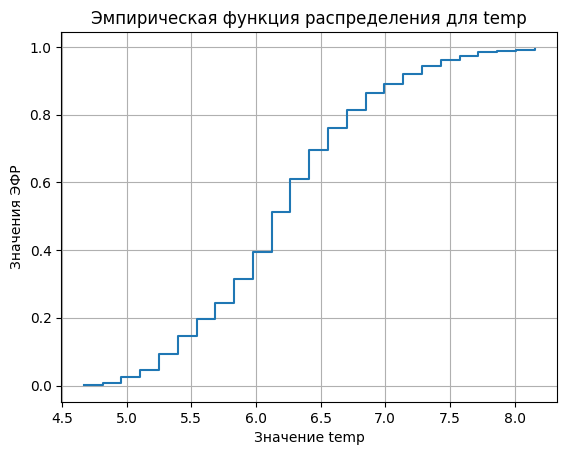

In [136]:
def ECDF(data, x):
    count = 0
    for i in data:
        if i <= x:
            count += 1
    return count / len(data)

sign = data_frame['temp']
number_points = 25
# шаг для x
dx = (sign.max() - sign.min())/number_points
x_list = [sign.min() + dx * i for i in range(number_points)]
y_list = [ECDF(sign, x) for x in x_list]

plt.plot(x_list, y_list, drawstyle='steps-post')
plt.title('Эмпирическая функция распределения для temp')
plt.xlabel('Значение temp')
plt.ylabel('Значения ЭФР')
plt.grid(True)
plt.show()

**Визуализация зависимой переменной**

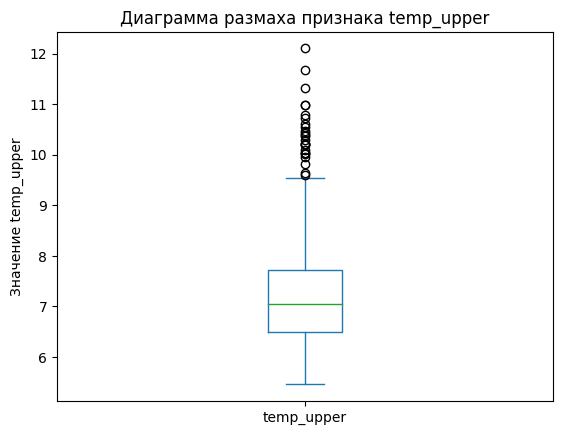

In [137]:
ax = data_frame['temp_upper'].plot.box(title='Диаграмма размаха признака temp_upper')
ax.set_ylabel('Значение temp_upper')
plt.show()

3. Постройте диаграмму рассеяния для независимого и зависимого признаков, подписывая оси и рисунок, определите наличие одиноко расположенные точек и, при наличии, удалите их.

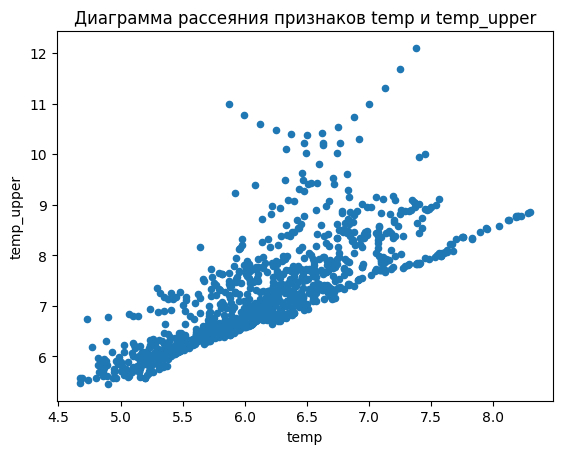

In [138]:
data_frame.plot.scatter('temp','temp_upper',title='Диаграмма рассеяния \
признаков temp и temp_upper');

В диаграмме имеются отдаленные точки, используем критерий, основанный на расстоянии от среднего значения с использованием стандартного отклонения. При необходимости меняем пороговое значение (std_limit).

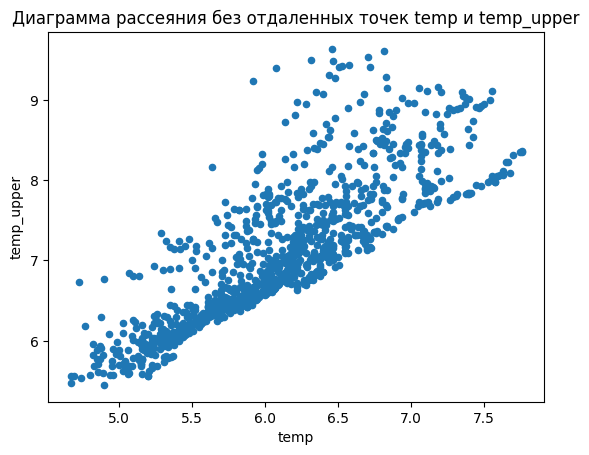

In [139]:
std_limit = 2.5
mean_t = data_frame['temp'].mean()
std_t = data_frame['temp'].std()
mean_tu = data_frame['temp_upper'].mean()
std_tu = data_frame['temp_upper'].std()

# Фильтрация данных на основе критерия
filter_data_frame = data_frame[
    (np.abs(data_frame['temp'] - mean_t) < std_limit * std_t) &
    (np.abs(data_frame['temp_upper'] - mean_tu) < std_limit * std_tu)
]

filter_data_frame.plot.scatter('temp','temp_upper',title='Диаграмма рассеяния \
без отдаленных точек temp и temp_upper');

4. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Определите лучший из двух подходов по показателю качества $R^2$ (коэффициенту детерминации).

Напишем класс для расчета точного подхода:

In [140]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x, y):
        assert x.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x) == len(y), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x)
        y_mean = np.mean(y)

        self.a_ = (x - x_mean).dot(y - y_mean) / \
                  (x - x_mean).dot(x - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

Очистим набор от точек, расположенных вдоль верхней границы графика при помощи булева индексирования:

In [141]:
x = data_frame['temp']
y = data_frame['temp_upper']
print(x.shape, y.shape)

x = x[y < np.max(y)]
y = y[y < np.max(y)]
print(x.shape, y.shape)

(1124,) (1124,)
(1123,) (1123,)


Изобразим на графике точки независимого и зависимого признаков и линию регрессии:

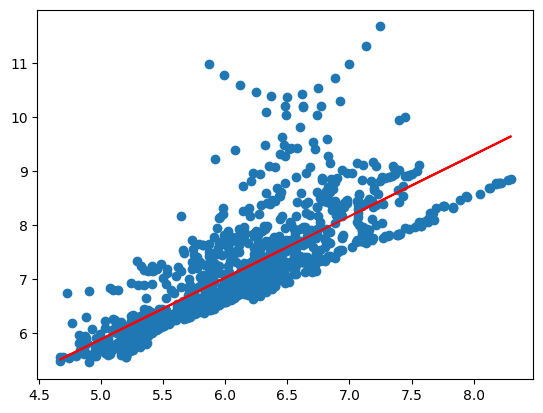

In [142]:
reg = SimpleLinReg()
reg.fit(x, y)
y_predict = reg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_predict, color='r');

Cоздадим модель простейшей нейронной сети из одного слоя с одним нейроном. В качестве функции потерь и для оценки качества модели используем среднюю квадратичную ошибка MSE:

In [153]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])
model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
)
model.fit(x, y, epochs=200, verbose=0)

Вычислим коэффициент детерминации для двух подходов:

In [154]:
y_predict2 = model.predict(x)
Q1 = np.sum((y - y_predict) ** 2)
Q2 = np.sum((y - y_predict2.flatten()) ** 2)
y_mean = np.mean(y)
S0 = np.sum((y - y_mean) ** 2)

r_squared1 = 1 - (Q1 / S0)
r_squared2 = 1 - (Q2 / S0)

print("R^2 для точной линии регрессии:", r_squared1)
print("R^2 для линии регрессии (ANN):", r_squared2)


36/36 [==============================] - 0s 957us/step
R^2 для точной линии регрессии: 0.5917636439514846
R^2 для линии регрессии (ANN): 0.5913041830062866


Из вычислений можно сделать вывод, что точный подход чуть лучше.

5. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду для линий регрессии.

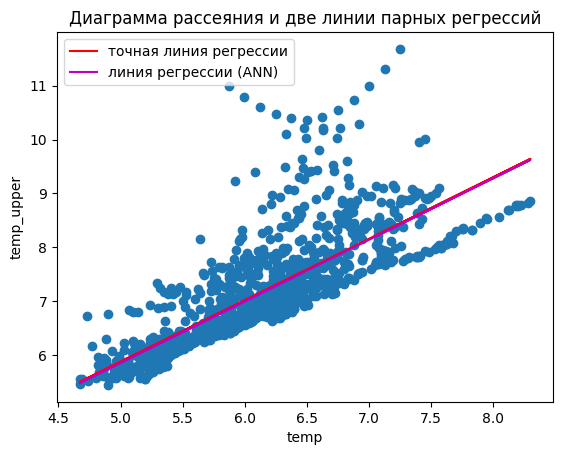

In [155]:
plt.scatter(x, y)
plt.plot(x, y_predict, c='r', label='точная линия регрессии')
plt.plot(x, y_predict2, c='m', label='линия регрессии (ANN)')
plt.title('Диаграмма рассеяния и две линии парных регрессий')
plt.xlabel("temp")
plt.ylabel("temp_upper")
plt.legend()

6. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака temp_upper). Нормализуйте зависимый признак temp_upper.

In [146]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_frame, test_size=0.2, random_state=42)

x_train = train_data.drop(columns=['temp_upper']).values
y_train = train_data['temp_upper'].values
x_test = test_data.drop(columns=['temp_upper']).values
y_test = test_data['temp_upper'].values

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(np.array(x_train))

y_train_s = (y_train - y_train.mean()) / y_train.std()

7. Используя созданный нормализующий слой и нормализованный зависимый признак, постройте регресоры на базе следующих моделей множественной регрессии:
* линейной регрессии
* гребневой регрессии (L2)
* лассо регрессии (L1)

Выберите коэффициенты регуляризации `l1` и `l2` так, чтобы нейронные сети для всех трех моделей обучались (значение ошибки уменьшалось в процессе обучения).

**Линейная регрессия**

In [120]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])


linear_model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
)

history_line = linear_model.fit(
    np.array(x_train), y_train_s,
    epochs=200,
    verbose=0,
    validation_split = 0.2)


In [121]:
hist_line = pd.DataFrame(history_line.history)
hist_line['epoch'] = history_line.epoch
hist_line.tail()

,loss,val_loss,epoch
195,0.000262,0.000181,195
196,0.000330,0.000244,196
197,0.000973,0.001335,197
198,0.000393,0.001141,198
199,0.000540,0.001640,199


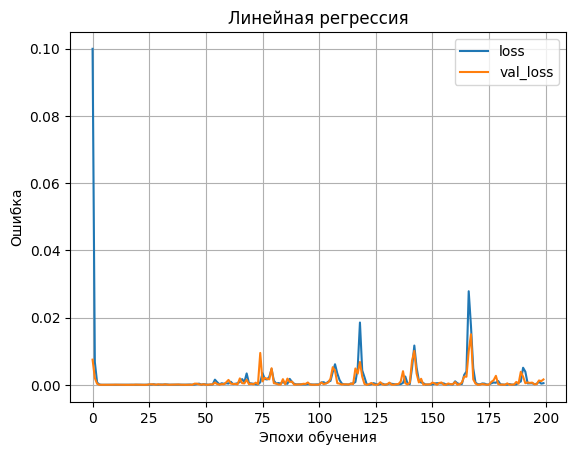

In [122]:
def plot_loss(history, title):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.title(title)
  plt.legend()
  plt.grid(True)

plot_loss(history_line, 'Линейная регрессия')

**Лассо регрессия (L1)**

In [123]:
l1_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])

l1_model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
)

history_l1 = l1_model.fit(
    x_train, y_train_s,
    epochs=200,
    verbose=0,
    validation_split = 0.2)

In [124]:
hist_l1 = pd.DataFrame(history_l1.history)
hist_l1['epoch'] = history_l1.epoch
hist_l1.tail()

,loss,val_loss,epoch
195,0.022299,0.022203,195
196,0.022395,0.022354,196
197,0.022401,0.022400,197
198,0.022400,0.022700,198
199,0.023022,0.023418,199


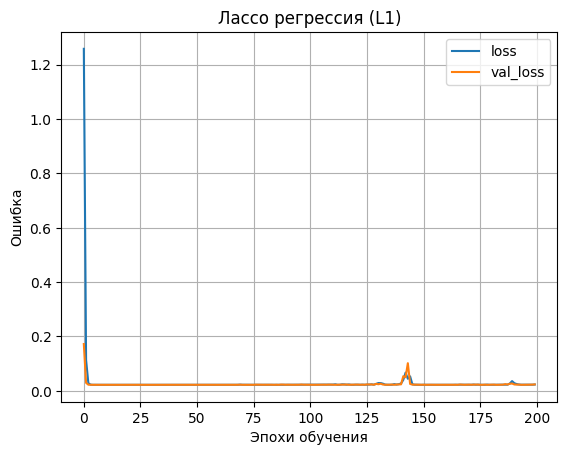

In [125]:
plot_loss(history_l1, 'Лассо регрессия (L1)')

**Гребневая регрессия (L2)**

In [147]:
l2_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))
])

l2_model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
)

history_l2 = l2_model.fit(
    x_train, y_train_s,
    epochs=200,
    verbose=0,
    validation_split = 0.2)

In [148]:
hist_l2 = pd.DataFrame(history_l2.history)
hist_l2['epoch'] = history_l2.epoch
hist_l2.tail()

,loss,val_loss,epoch
195,0.025575,0.025710,195
196,0.025723,0.025956,196
197,0.024994,0.025809,197
198,0.025184,0.026456,198
199,0.026786,0.028503,199


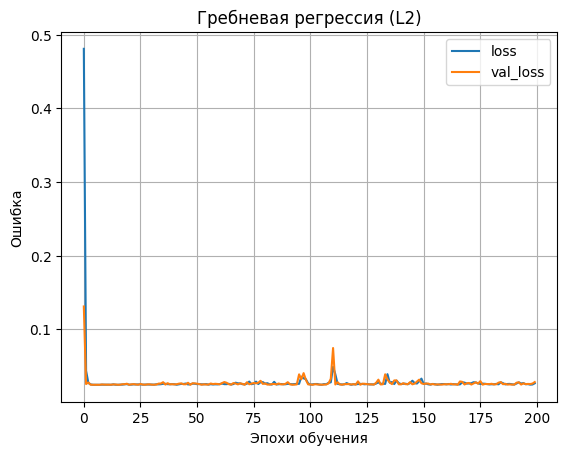

In [149]:
plot_loss(history_l2, 'Гребневая регрессия (L2)')

8. Определите на контрольной выборке (с нормализованным зависимым признаком) модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

In [150]:
linpred = linear_model.predict(x_test)
l1pred = l1_model.predict(x_test)
l2pred = l2_model.predict(x_test)

mse_test_line = np.sum((linpred - y_test)**2) / len(y_test)
mse_test_l1 = np.sum((l1pred - y_test)**2) / len(y_test)
mse_test_l2 = np.sum((l2pred - y_test)**2) / len(y_test)

print(f"Linear:{mse_test_line}\nL1:{mse_test_l1} \nL2:{mse_test_l2}")

8/8 [==============================] - 0s 1ms/step
Linear:12173.495555555555
L1:12093.577777777778 
L2:12073.708888888888


По метрике MSE лучшая модель - гребневая

9. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

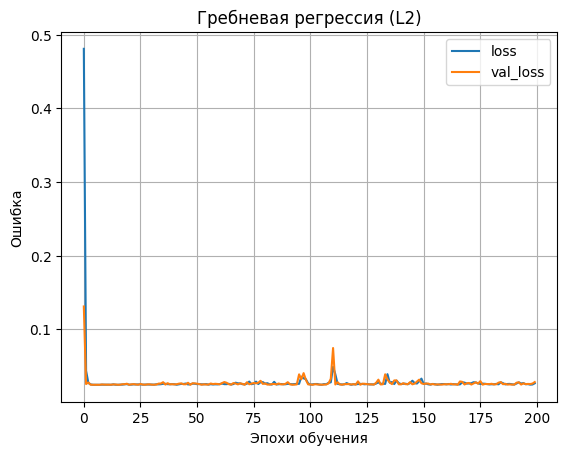

In [156]:
plot_loss(history_l2, 'Гребневая регрессия (L2)')

10. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.

In [152]:
temp_lower_median = np.median(data_frame["temp_lower"])
temp_lower_median

5.145